In [27]:
#Insertion Sort

def insertion_sort(n):
    count = 0 #count of lines executed
    for j in range(1, len(n)):
        count += 1
        key = n[j]
        count += 1
        i = j - 1
        count += 1
        while i >= 0 and n[i] > key:
            count += 1
            n[i+1] = n[i]
            count += 1
            i = i - 1
            count += 1
        n[i + 1]  = key
        count += 1
    return count

In [42]:
# Merge Sort

def merge(A, p, q, r):
    count = 0

    left = A[p:q+1]
    count += 1
    right = A[q+1:r+1]
    count += 1

    i = 0
    count += 1
    j = 0
    count += 1
    k = p
    count += 1

    count += 1
    while i < len(left) and j < len(right):
        count += 1
        if left[i] <= right[j]:
            count += 1
            A[k] = left[i]
            count += 1
            i += 1
        else:
            A[k] = right[j]
            count += 1
            j += 1
            count += 1
        k += 1
        count += 1
    
    count += 1
    while i < len(left):
        A[k] = left[i]
        count += 1
        i += 1
        count += 1
        k += 1
        count += 1
    count += 1
    while j < len(right):
        A[k] = right[j]
        count += 1
        j += 1
        count += 1
        k += 1
        count += 1
    return count


def merge_sort_internal(A, p, r):
    count = 0
    count += 1
    if p >= r: # Zero or one element
        count += 1
        return count
    q = (p + r)//2
    count += 1
    count += merge_sort_internal(A, p, q) # Left 
    count += 1
    count += merge_sort_internal(A, q+1, r) # Right
    count += 1
    count += merge(A, p, q, r)
    count += 1
    return count

# Simpler calling without having to specify the range when calling
def merge_sort(array):
    count = merge_sort_internal(array, 0, len(array))
    return count

nums = [5, 4, 3, 2, 1]
merge_sort(nums)
print(nums)

[1, 2, 3, 4, 5]


In [56]:
# Heap sort

class Heap:
    def __init__(self, array):
        self.array = array
        self.heap_size = len(array)

def left(i):
    return i*2+1

def right(i):
    return i*2+2

def parent(i):
    return i//2


def max_heapify(A:Heap, i):
    count = 0
    l = left(i)
    count += 1
    r = right(i)
    count += 1
    count += 1
    if l <= A.heap_size and A.array[r] > A.array[i]:
        largest = l
        count += 1
    else:
        largest = i
        count += 1
    
    count += 1
    if r <= A.heap_size and A.array[r] > A.array[largest]:
        largest = r
        count += 1
    
    count += 1
    if largest != i:
        A.array[i], A.array[largest] = A.array[largest], A.array[i]
        count += 1
        count += max_heapify(A, largest)
        count += 1
    return count



def build_max_heap(A:Heap, n):
    count = 0
    A.heap_size = n
    count += 1
    for i in range(n//2, 1, -1):
        count += 1
        count += max_heapify(A, i)
        count += 1
    return count

def heap_sort_internal(A:Heap, n):
    count = 0
    count += build_max_heap(A, n)
    for i in range(n, 0, -1): # Step range go backwards from n-1 to but not including 0
        count += 1
        A.array[0], A.array[i] = A.array[i], A.array[0] # Change first index with i
        count += 1
        A.heap_size -= 1
        count += 1
        count += max_heapify(A, 0)
        count += 1
    return count

def heap_sort(array):
    heap = Heap(array=array)
    count = heap_sort_internal(heap, len(heap.array)-1)
    array = heap.array
    return count


82

In [30]:
# Quick Sort

def partition(A, p, r):
    x = A[r]
    i = p - 1

    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i + 1


def quick_sort_internal(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quick_sort_internal(A, p, q-1) # recursive low side
        quick_sort_internal(A, q+1, r) # recursive high side

# For easier usage
def quick_sort(array):
    quick_sort_internal(array, 0, len(array)-1)



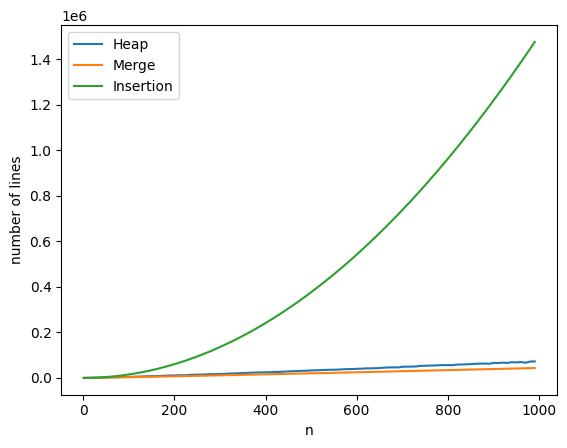

In [58]:

import matplotlib.pyplot as plt

def plot_sort(sortFunc, name, max, step):
    Yaxis = []
    Xaxis = []
    for i in range(1, max, step):
        nums = [el for el in range(i, 0, -1)]
        count = sortFunc(nums)
        Xaxis.append(len(nums))
        Yaxis.append(count)
    plt.plot(Xaxis, Yaxis, label=name)



n = 1000
step = 10
plot_sort(heap_sort, "Heap", n, step)
plot_sort(merge_sort, "Merge", n, step)
plot_sort(insertion_sort, "Insertion", n, step)
plt.xlabel("n")
plt.ylabel("number of lines")
plt.legend()

plt.show()

